## Task 1
### Prediction using Supervised ML

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

In [4]:
#Getting the data 

data = pd.read_csv('student_scores.csv')
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


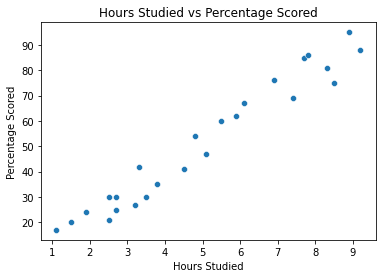

In [8]:
sns.scatterplot(x=data['Hours'],y= data['Scores'])
plt.title("Hours Studied vs Percentage Scored")
plt.xlabel("Hours Studied")
plt.ylabel("Percentage Scored")
plt.show()

<AxesSubplot:ylabel='Frequency'>

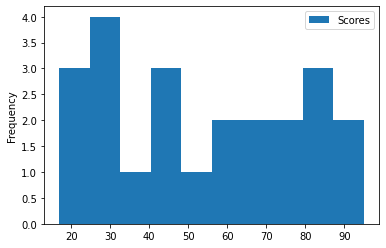

In [9]:
data.groupby(["Hours"]).mean().plot(kind = 'hist')

In [10]:
#Dividing the data
#Separating the "Hours" and "Percentage"
X = data.drop('Scores', axis=1)
y = data['Scores']

In [11]:
X.head()

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5


In [12]:
y.head()

0    21
1    47
2    27
3    75
4    30
Name: Scores, dtype: int64

In [13]:
#Splitting the data into training and testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 42)

In [14]:
#Using Linear Regression
model= LinearRegression()

In [15]:
model.fit(x_train, y_train)
print("Model Trained")

Model Trained


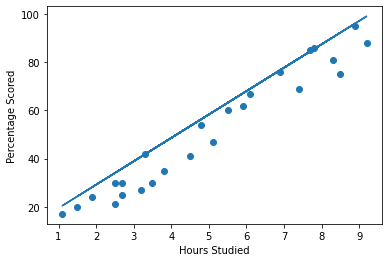

In [17]:
#Plotting the regression line --> y = mx+c
line = model.coef_ * X + model.coef_
#Plotting the data 
plt.scatter(X, y)
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Scored')
plt.plot(X, line)
plt.show()

In [18]:
#Making predictions
y_pred = model.predict(x_test)

In [19]:
#Testing with our own data
hours = 8.35
hours1 = np.asarray(hours).reshape(1,-1)
y_pred1 = model.predict(hours1)
print("Number of hours studied: {}".format(hours))
print("Predicted score: {}".format(y_pred1[0]))

Number of hours studied: 8.35
Predicted score: 83.59303689994658


In [20]:
#Evaluating the model 
#The coefficient of determination (r^2) measures the percentage of variation in the dependent variable explained
#by the predictor in the predictor (independent) variable
print("The r2 score is {}".format(r2_score(y_test, y_pred)))
#Using mean square error
print("The Mean Absolute Error is {}".format(mean_absolute_error(y_test, y_pred)))

The r2 score is 0.9553509219739938
The Mean Absolute Error is 4.425394675156182


### We have a very high r2 score --> this indicates our linear model is very good